<img src="./img/HWNI_logo.svg"/>

# Tutorial B - Dependence and Correlation

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import util.utils as utils
import util.shared as shared

shared.format_plots()
shared.format_dataframes()

## Introduction

In this tutorial,
we will work through the definition and import of correlation
as a measure of statistical dependence,
and then see some examples where correlations fails.
In the associated lab,
we will learn to calculate correlation coefficients using Python tools
and then get $p$-values using bootstrapping,
as described in the previous tutorial.

## Statistical Dependence

One way to understand what we mean when we say something is random
is that we mean that we don't know what value it will take
because we don't have some other pieces of critical information.
For example, as demonstrated in the other tutorial for this section,
the random numbers generated by `np.random` are only random because
we don't know the value of the seed; otherwise,
the outputs would be deterministic.
That is to say,
the outputs *depend* totally on the input values.

But other cases are more subtle:
much of the randomness of a die roll is because we don't know
the position and velocity of the die before we let go of it,
but even if we did, there would still be some randomness left,
since we don't know the currents of the air through which it will pass
or the fine microscale structure of table surface it passes over as it rolls,
which all have some influence on the final outcome.

In this case, we'd say that there is some amount of *statistical dependence*
between the outcome of a die roll and its state when it leaves our hands.
Another example of two variables with statistical dependence
might be temperature in San Francisco and temperature in Berkeley:
since the two cities are very close by, their temperatures tend to vary together.
This means that we can guess the temperature in San Francisco much more easily
if we know the temperature in Berkeley than if we do not know it.

We can formalize the notion of statistical independence as follows:
if the variable $X$ is independent of $Y$, then

$$
p(X\lvert Y) = p(X)
$$

Independence is a two-way street, so we also get

$$
p(Y\lvert X) = p(Y)
$$

Recall that the vertical bar was introduced back when we discussed hypothesis testing.
It is pronounced *given*,
and something like $p(Y\lvert X)$ means "the conditional probability distribution of $Y$ given the value of $X$".
So we can read the second equation above as "the probability distribution of $Y$ given the value of $X$ is the same as the probability distribution of $Y$ without taking $X$ into account". Make sure you can connect this idea to the statement about temperatures in San Francisco and Berkeley.

We learned about conditional distributions in order to better understand hypothesis testing.
In that case, the two random variables were the outcome of our statistical test and the truth or falsehood of the hypothesis we were testing.
It was very important that these two variables had a strong dependence on each other:
if they were independent, then our belief about the chance that our hypothesis was true would be *unchanged* by the outcome of the experiment, and so our statistical test wouldn't have tested the hypothesis at all!

To put the above in mathematical terms, we'd say that in order for a hypothesis test to be useful,
we want it to be the case that:

$$
p(\text{hypothesis}\lvert\text{test outcome}) \neq p(\text{hypothesis})
$$

But statistical dependence has much wider potential use:
we might want to know whether
knowing if a person smokes helps us guess their whether they have cancer or lung disease,
or whether knowing the input stimulus to an animal helps us guess the activity in their brain.
Importantly,
we want to be able to *quantify* statistical dependence,
as covered in the next section of the tutorial,
after the aside below,
and then we want to be able to *test hypotheses* about dependence,
as covered in the lab for this section.

#### Aside on Dependence and Causation

Notice that, in the section above,
no mention was made of the two variables having a *causal* relationship with one another.
That is,
we defined statistical dependence in a way that is agnostic to whether one variables
*causes* the value of the other variable to change;
instead, we focused on whether the value of one variable could be used to better predict
the other variable.

Here's a well-known example of the distinction:
there is a statistical dependence
between the amount of ice cream being sold in an American city
and the homicide rate in that city.
From this,
we would be correct in inferring that,
if we wanted to track the homicide rate,
we could collect ice cream sale data as a proxy
and use that to help us predict fluctuations in murder rate,
and this would be better than guessing that rate without ice cream sale information.

We would be incorrect,
however,
in inferring that if we wanted to decrease the homicide rate,
we should ban ice cream sales,
as seems intuitively obvious.
Instead,
[our best guess](http://www.slate.com/blogs/crime/2013/07/09/warm_weather_homicide_rates_when_ice_cream_sales_rise_homicides_rise_coincidence.html)
for *why* this dependence exists
is that hot weather tends to increase
both ice cream sales and homicides,
so changing ice cream sales directly won't save any lives.

This distinction between statistical or empirical dependence and
causal structure is deep enough that
[philosophers disagree](https://plato.stanford.edu/entries/induction-problem/)
as to whether it can even be solved.
For the purposes of this course,
we will simply interpret statistical dependence carefully
and refrain from making causal claims unless we've performed
a randomized, controlled experiment.

## Quantifying a Form of Statistical Dependence with the Correlation

The most general definition for statistical dependence between two variables is given by the
[mutual information](http://charlesfrye.github.io/stats/2016/03/29/info-theory-surprise-entropy.html),
a quantity that can be used for everything determining the maximum amount a file can be compressed
to quantifying
[how much the brain knows about the outside world](https://www.nature.com/neuro/journal/v2/n11/full/nn1199_947.html).

Unfortunately, the mutual information is extremely difficult to calculate:
it requires a very large amount of data and some hefty computations.
So we need an easy to calculate substitute.

As a first pass,
let's reduce our ambitions from determining whether there is any, *possibly very difficult*, way
that the value of $X$ can be used to predict the value of $Y$,
and instead consider simple methods for using one value to predict another.
For example,
it might be the case that when $X$ is large, $Y$ is also large,
as is the case for the temperatures of San Francisco and Berkeley.

But how do we measure of "largeness"?
Here are some pitfalls with just using the raw values of $X$ and $Y$:

**Concern 1**.
Our measure of statistical dependence would change
when we switch our units, e.g. from Celsius to Fahrenheit


**Concern 2**. Our measure would change when we add or subtract the same numbers from either variable,
e.g. when we switch our units from Celsius to Kelvin

**Concern 3**. Our measure of statistical dependence would change depending on scale,
and we'd find ourselves e.g. saying that the temperatures of the Sun and Berkeley
have a stronger dependence than do those San Francisco and Berkeley,
just because the numbers are bigger

We can avoid all of these issues by subtracting the mean from our data,
thus handling Concern 2,
and dividing by the standard deviation of the data,
thus avoiding Concerns 1 and 3.
This is also known as [*$z$-scoring*](https://en.wikipedia.org/wiki/Standard_score) or *standardizing* the data.

The standard deviation was introduced in the section on descriptive statistics
(look back if you need a refresher).
It is closely related to the variance.
The sample variance $v_a$ for a random variable $a$ was calculated as follows:

$$
v_a = \frac{1}{n-1}\sum_{i=1}^n \left(a_i - \mu_a\right)^2
$$

where $n$ is the total number of data points and $\mu_a$ is the mean value of $a$.

The standard deviation is the square root of the variance:

$$
s_a = \sqrt{v_a} = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}{\left(a_i-\mu_a\right)^2}}
$$

Now, how do we determine whether the $z$-scored versions of $X$ and $Y$ tend to be large at the same time?
The simplest way is to take the values $X$ and the values of $Y$ and multiply them together.
If the values are both bigger than $0$ or both less than $0$, then the result is positive,
while if the values are on opposite sides of $0$, then the result is negative.

This measure of dependence is called the *correlation*.
Its formula appears below

$$
r = \frac{1}{n-1} \sum_{i=1}^{n}{\frac{(x_i-\mu_x)}{s_x}
                                  \frac{(y_i-\mu_y)}{s_y}}
$$

The correlation is greater than $0$
when the two variables are above or below their means at the same time,
and less than $0$
when the two variables are always on opposite sides of their means.
When the correlation is $0$,
it means that $X$ and $Y$ are equally likelt to be
both above their means or both below their means.
In that case,
we say that $X$ and $Y$ are *uncorrelated*.

If the value of $X$ can be used to perfectly predict the value of $Y$,
the correlation will be either $-1$ or $1$,
depending on whether increasing $X$ causes
$Y$ to decrease or increase.

Instead of reflecting whether the value of $X$ is at all helpful for predicting the value of $Y$,
the correlation reflects whether we can predict the value of $Y$ by multiplying $X$ by some fixed number
and adding another number.
Loosely speaking, that means we're testing whether

$$
Y \approx m\cdot X + b
$$

In future sections, we will see that this is also called a *linear model* or a *linear regression*.

#### A Brief Aside on Nomenclature and the History of Statistics

Above, the correlation is represented by the letter $r$,
as is tradition.
Why $r$?
Well, the $r$ stands for *regression*,
and we've just noted that there's a connection between
correlation and linear regression.

But why *regression*? Doesn't that usually mean moving backwards? 

If you're curious, check out the material below for a bit of history, otherwise you can move on to the next section.

In fact, it does mean moving backwards in statistics as well. The term goes back to the late 19th century, when statistics was being developed, primarily for the purpose of measuring human populations. Of particular interest to statisticians at this time was the science of heredity (biological evolution being one of the first scientific theories that included randomness). 

Note also that at this time, most scientists and mathematicians were aristocratic or independently wealthy males, as only a person with a steady income from other sources could afford the luxury of experimental apparatus and uninterrupted study, and women were largely barred. The Western European upper classes of this time were enamored with the theories of scientific racism and sexism, which helped to assuage the cognitive dissonance caused by combining their liberal sentiments about all persons being created equal with the material fact that equal opportunity was denied to almost all persons in their society, and they kind of liked it that way.

Enter [Sir Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton), the half-cousin of Charles Darwin and the scion of a Quaker family who made their fortune dealing arms [(I am not making this up)](https://theironroom.wordpress.com/2015/03/23/faith-and-disunity-samuel-galton-and-the-quakers/). He was concerned to know whether the male children of tall fathers were themselves taller than average -- prejudices regarding height being then more explicit then than [they are now](http://gladwell.com/blink/why-do-we-love-tall-men/). He collected the relevant data and then invented linear modeling to summarize it. 

Sir Francis was delighted to discover that the average height of the son was correlated with the average height of the father, but horrified to see that the slope of this line was less than 1! This meant that, on average, sons would be shorter than their fathers, and their sons shorter than them, and so on. He termed this phenomenon [*regression to mediocrity*](https://books.google.com/books?id=JPcRAAAAYAAJ&pg=PA246#v=onepage&q&f=false), and the term *regression* was thereafter applied to the general procedure of fitting lines to data.

## Correlated and Uncorrelated Data

To get an intuitive sense for what it means for data to be correlated,
we'll take a look at some data that is
positively correlated, negatively correlated,
and has no correlation.
For each of the examples below,
there are no other kinds of statistical dependence between $X$ and $Y$,
and so the correlation perfectly describes the strength and direction of the dependence.

We generate the data by first randomly sampling `xs`, then applying a transformation `f` to those `xs`,
and then adding some random `noise` to `f(x)`.
For this first section, `f` is a *linear* function,
that is,
one of the form $f(x)=mx+b$.

The first cell below sets some parameters: the `num`ber of `points` to sample, the `spread` or variance of the `x` values, and the amount of randomness to add to the `y` values.

In [2]:
num_points = 1000
x_spread = 1
noise_level = 1

The next cell defines three possible choices for `f`:
one that will give a `negative` correlation,
one that will give a `positive` correlation,
and one that will give `zero` correlation.

To change which one is used,
change which one is assigned to the name `f` at the end of the cell.

In [3]:
negative = lambda x: -0.5*x+1
positive = lambda x: 3*x
zero = lambda x: 1

f = positive

The final cell generates the `xs` and `ys`
and then plots them using `sns.jointplot`.

Read the text cell below for help interpreting the resulting figure.

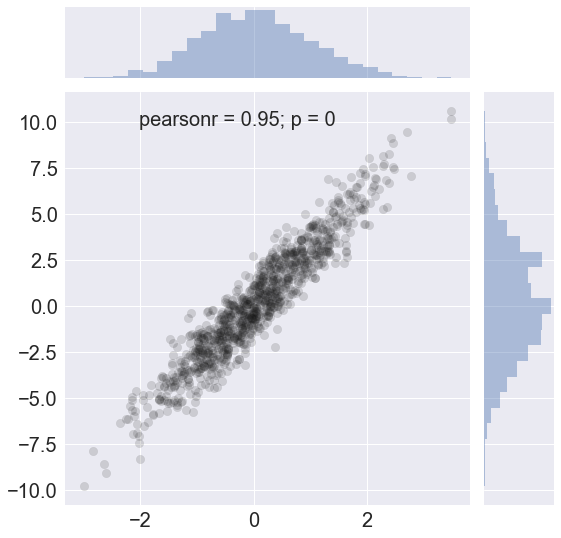

In [4]:
xs = np.random.standard_normal(num_points)*x_spread
ys = np.asarray([f(x)+np.random.standard_normal()*noise_level for x in xs])

scatter_kws = {'alpha':0.15,
                'color':'k',
                 's':72}

sns.jointplot(xs,ys,
              joint_kws = scatter_kws,
              size = 8);

The central figure is a scatter plot of the actual data values,
with `xs` on the x-axis and `ys` on the y-axis.
Plotted above is a histogram of the `xs`,
while the histogram for the `ys` is on the right.

There is also a floating bit of text.
The first number is the value of the correlation,
also known as *Pearson's correlation* or *Pearson's $r$*.
The second number is the $p$-value of this correlation,
obtained via bootstrapping,
as described in the bootstrapping tutorial and in this tutorial's associated lab.

### Cautionary Tales

In addition to
[believing it implies causation](http://www.tylervigen.com/spurious-correlations),
folks frequently misinterpret correlation to also imply
the presence or absence of statistical dependence.

Below, we'll look at some data that has statistical dependence that is poorly captured by the correlation. In these cases, $Y \not\approx m\cdot X+b$, but $Y \approx f(X)$, for different choices of $f$.

Try out each of the functions named in the second cell below.
See if you can explain to yourself why some of them have correlations close to $0$
and $p$-values that are randomly distributed between $0$ and $1$
and why others have correlations that are fairly high
and low $p$-values.

In [5]:
num_points = 1000
noise_level = 1
x_spread = 1

In [6]:
quadratic = lambda x: np.power(x,2)

arctangent = lambda x: 5*np.arctan(3*x)

threshold = lambda x: 2*max(x,0)

cross = lambda x: np.random.choice([-2,2])*x

In [7]:
f = arctangent

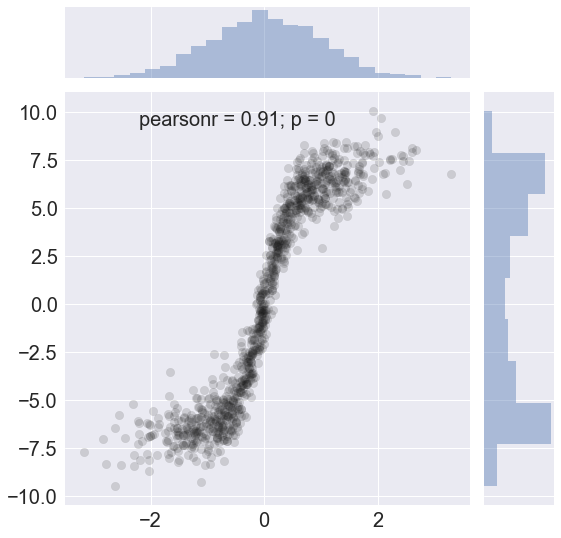

In [8]:
xs = np.random.standard_normal(num_points)*x_spread
ys = np.asarray([f(x)+np.random.standard_normal()*noise_level for x in xs])

scatter_kws = {'alpha':0.15,
                'color':'k',
                 's':72}

sns.jointplot(xs,ys,
              joint_kws = scatter_kws,
              size = 8);

In the lab for this tutorial,
we will see how to calculate the correlation with a variety of Python tools,
including "by hand" with numpy,
and then we'll work out how to use bootstrapping to compute $p$ values for our correlation coefficients.